### Create the region mask for the Temperature offshore boxes 1000 to 2000

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import xarray as xr
import cmocean as cm
import glob
import matplotlib.colors as col
# need to install opencv-python for this:
#import cv2

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/43303/status,
Dashboard: /proxy/43303/status,Workers: 7
Total threads: 28,Total memory: 251.18 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:32925,Workers: 7
Dashboard: /proxy/43303/status,Total threads: 28
Started: Just now,Total memory: 251.18 GiB
Comm: tcp://127.0.0.1:45185,Total threads: 4
Dashboard: /proxy/45845/status,Memory: 35.88 GiB
Nanny: tcp://127.0.0.1:36201,


In [3]:
session = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
exp = '01deg_jra55v140_iaf_cycle3'

In [4]:
lat_range = slice(-90,-50)

contour_depth = 1000

### Import bathymetry and find depth contours

In [5]:
yt_ocean = cc.querying.getvar(exp,'yt_ocean',session,n=1)
yt_ocean = yt_ocean.sel(yt_ocean=lat_range)
xt_ocean = cc.querying.getvar(exp,'xt_ocean',session,n=1)

ht = cc.querying.getvar(exp,'ht',session,n=1)
ht = ht.sel(yt_ocean=lat_range)
# fill in land with zeros:
ht = ht.fillna(0)

temp_mask = np.copy(ht)
temp_mask[np.where((ht<contour_depth))] = 0
temp_mask[np.where(ht>=contour_depth)] = 1

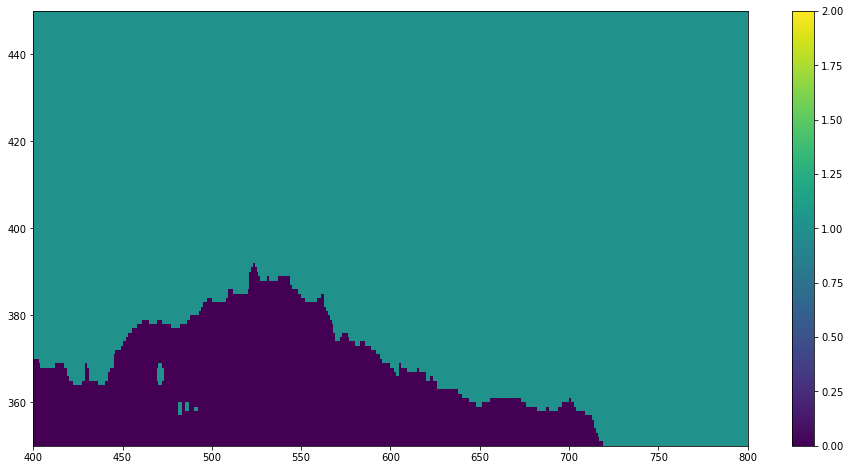

In [6]:
# in case you want to check what contour_mask0 looks like, e.g. is it continuous around Antarctica?

plt.figure(1,figsize=(16,8))
plt.pcolormesh(temp_mask)
plt.colorbar()
plt.clim((0,2))
plt.xlim((400,800))
plt.ylim((350,450));

In [7]:
import os
save_dir =  '/g/data/v45/ns3783/scripts/masks'
outfile = os.path.join(save_dir,'Fig1_mask'+str(contour_depth)+'m.npz')

np.savez(outfile,temp_mask=temp_mask,xt_ocean=xt_ocean,yt_ocean=yt_ocean)

In [9]:
xu_ocean = cc.querying.getvar(exp,'xu_ocean',session,n=1)
yu_ocean = cc.querying.getvar(exp,'yu_ocean',session,n=1)
yu_ocean = yu_ocean.sel(yu_ocean=lat_range)

#Make U
hu = cc.querying.getvar(exp,'hu',session,n=1)
hu = hu.sel(yu_ocean=lat_range)
# fill in land with zeros:
hu = hu.fillna(0)

temp_maskU = np.copy(hu)
temp_maskU[np.where((hu<contour_depth))] = 0
temp_maskU[np.where(hu>=contour_depth)] = 1

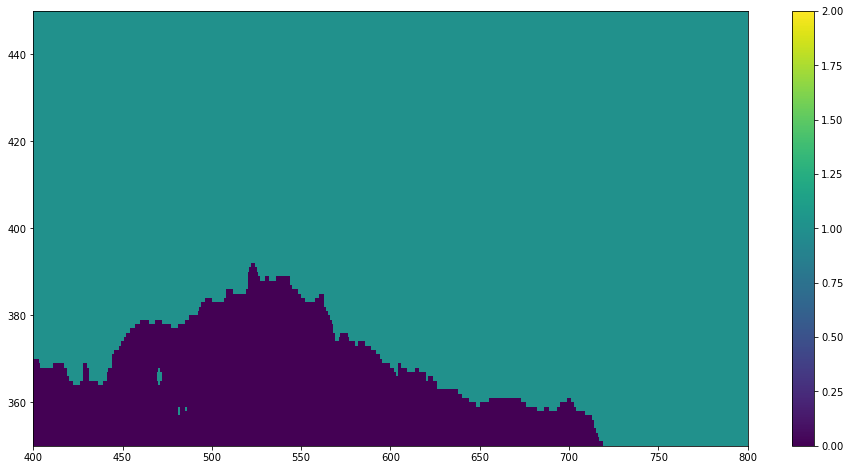

In [10]:
# in case you want to check what contour_mask0 looks like, e.g. is it continuous around Antarctica?
plt.figure(1,figsize=(16,8))
plt.pcolormesh(temp_maskU)
plt.colorbar()
plt.clim((0,2))
plt.xlim((400,800))
plt.ylim((350,450));

In [11]:
import os
save_dir =  '/g/data/v45/ns3783/scripts/masks'
outfile = os.path.join(save_dir,'Fig1_mask_U'+str(contour_depth)+'m.npz')

np.savez(outfile,temp_maskU=temp_maskU,xu_ocean=xu_ocean,yu_ocean=yu_ocean)